Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Linear Transformation

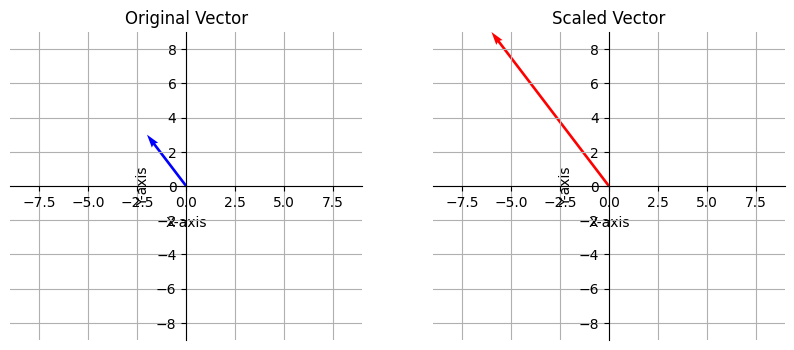

In [7]:
vector = np.array([[-2], [3]])

scale_matrix = np.array([[3, 0], [0, 3]])

# ย่อเวกเตอร์
scaled_vector = scale_matrix @ vector

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector')
axes[1].quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Scaled Vector')

axes[0].spines['left'].set_position('center')
axes[0].spines['bottom'].set_position('center')
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].set_xlim(- 9, 9)
axes[0].set_ylim(- 9, 9)
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[0].set_title('Original Vector')
axes[0].grid()

axes[1].spines['left'].set_position('center')
axes[1].spines['bottom'].set_position('center')
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].set_xlim(- 9, 9)
axes[1].set_ylim(- 9, 9)
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
axes[1].set_title('Scaled Vector')
axes[1].grid()

plt.show()

Determinant of Matrix

In [ ]:
from scipy import linalg

matrix = np.array([[6, 1, 5, 7], [-5, -2, -4, -2], [1, 2, 3, 4], [3, 3, 2, 2]])

# หา determinant ของเมทริกซ์
determinant = linalg.det(matrix)

print("Matrix:")
print(matrix)

print("\nDeterminant:")
print(determinant)

Matrix:
[[ 6  1  5  7]
 [-5 -2 -4 -2]
 [ 1  2  3  4]
 [ 3  3  2  2]]

Determinant:
-123.00000000000004


Eigenvalue-Eigenvector

In [9]:
import numpy.linalg as linalg

matrix = np.array([[3, 0], [8, -1]])

# หา eigenvalues และ eigenvectors ของเมทริกซ์
eigenvalues, eigenvectors = linalg.eig(matrix)

print("Matrix:")
print(matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Matrix:
[[ 3  0]
 [ 8 -1]]

Eigenvalues:
[-1.  3.]

Eigenvectors:
[[0.         0.4472136 ]
 [1.         0.89442719]]


In [10]:
matrix = np.array([[5, -6, -6], [-1, 4, 2], [3, -6, -4]])

# หา eigenvalues และ eigenvectors ของเมทริกซ์
eigenvalues, eigenvectors = linalg.eig(matrix)

print("\nMatrix:")
print(matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Matrix:
[[ 5 -6 -6]
 [-1  4  2]
 [ 3 -6 -4]]

Eigenvalues:
[1. 2. 2.]

Eigenvectors:
[[-0.6882472  -0.68543457 -0.94146641]
 [ 0.22941573  0.31415751 -0.19764316]
 [-0.6882472  -0.6568748  -0.27309005]]


In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

x = data.iloc[:,0:4]
target = data.iloc[:,4]

display(data)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
import numpy as np

def PCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)

    # หา eigenvalues และ eigenvectors ของเมทริกซ์ covariance
    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalue = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

<Axes: xlabel='PC1', ylabel='PC2'>

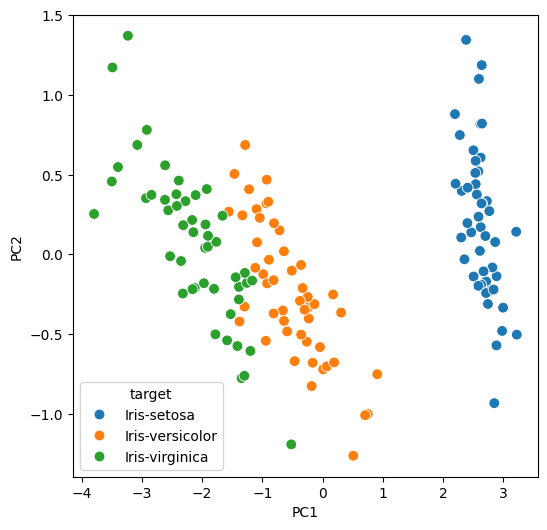

In [13]:
x_reduced = PCA(x,2)

principal_df = pd.DataFrame(x_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df, x = 'PC1', y = 'PC2', hue = 'target', s = 60 )

In [14]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


In [15]:
cols=['sepal length', 'sepal width', 'petal length', 'petal width']
data[cols]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


PCA In Practice

In [16]:
from sklearn.model_selection import train_test_split # load เครื่องมือในการ split ข้อมูลมาใช้

In [18]:
cols =['sepal length','sepal width','petal length','petal width'] # เลือกตัวแปรต้นที่จะใช้สร้าง model
X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data['target'],
    train_size = 0.7
)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train) # สร้าง model ที่เรียนรู้จาก training set แล้ว
model.score(X_test,y_test)

0.9777777777777777

In [20]:
cols2 =['PC1','PC2'] # เลือกตัวแปรต้นที่จะใช้สร้าง model
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    principal_df[cols2],
    principal_df['target'],
    train_size = 0.7
)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train2, y_train2) # สร้าง model ที่เรียนรู้จาก training set แล้ว
model.score(X_test2,y_test2)

0.9555555555555556